**Exercice (régression linéaire multiple & knnRegressor) :** 
- Prédire les prix des maisons de la compétition donnée ci-dessous en utilisant la régression linéaire multiple et le knnRegressor
- cours sur la regression linéaire cf  **Regression_lineaire.pdf**
- Lien de la compétition https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Pour la partie modelling, on utilisera : KNNRegressor et LinearRegression


# Demarche a suivre :
1) Nettoyage des données

2) Analyse univariée et bivariée : inspection, visualisation et analyse des données (étude des dépendances entre les variables, corrélation, test d'hypothèses...)

3) Prédiction de la colonne survived avec le knn_classifier

4) Mesure de la qualités de prévisions



In [1]:
#import package
import pandas as pd
import numpy as np

#import package visualisation
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest


#Import des outils de preprocessing : 
from sklearn.preprocessing import OrdinalEncoder

#import package train test set :
from sklearn.model_selection import train_test_split, KFold 

#import package model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#import package mesure precision model :
from sklearn.metrics import accuracy_score, mean_squared_error

#import pour grid search : 

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer #permet de trouver le modele faisant le meilleur score
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#utilisation de feature_selection dans un pipeline
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


### Récapitulatifs de l'Analyse du jeu de données :
- Modèle supervised ou unsupervised ?
    - présence d'une target : SalePrice

- Caracteristiques des features :
    - Nombre : 80

- Descriptions de certaines features (avec l'aide du fichier data_description.txt): 
    - MSSubClass : Identifie le type de logement concerné par la vente. 20=1-STORY 1946 & NEWER ALL STYLES, etc.

    - MSZoning : Identifie la classification générale de zonage de la vente. A = Agriculturen etc.
    - OverallQual : Évalue l'ensemble des matériaux et de la finition de la maison. 10 = très excellent



- Caracteristiques target :
    - SalePrice : quantitative continue
    - Analyse du jeu de données :

In [3]:
housing  = pd.read_csv('train.csv')
df = housing.copy()

In [4]:
housing.shape
#seulement 1460 observations mais 81 features et target 

(1460, 81)

In [5]:
#regardons toutes les colonnes : 
pd.set_option('display.max_columns',None)

In [6]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Regardons les colonnes pouvant prendres moins de 30 valeurs différentes : 

In [7]:
print("\nColonnes ayant moins de 30 valeurs différentes :\n")
cpt = 0
for i in housing:
    if housing[i].nunique() <30 :
        print(i, ":\n", housing[i].unique())
        cpt +=1


Colonnes ayant moins de 30 valeurs différentes :

MSSubClass :
 [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning :
 ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street :
 ['Pave' 'Grvl']
Alley :
 [nan 'Grvl' 'Pave']
LotShape :
 ['Reg' 'IR1' 'IR2' 'IR3']
LandContour :
 ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities :
 ['AllPub' 'NoSeWa']
LotConfig :
 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope :
 ['Gtl' 'Mod' 'Sev']
Neighborhood :
 ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 :
 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 :
 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType :
 ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle :
 ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual :

In [8]:
print("Nombre de colonne ne pouvant pas avoir plus de 30 valeurs différentes : ", cpt)

Nombre de colonne ne pouvant pas avoir plus de 30 valeurs différentes :  61


**Observations :**
- On voit que sur l'ensemble des variables, il n'y a **aucunes** variable **quantitative continue**
- uniquement des variables **qualitatives** et **discrètes**

donc on peut les recuperer sous la denomination de var_categoriques :

In [9]:
#recuperation des variables categoriques : 
var_categorique = []
for i in housing:
    if housing[i].nunique() <30 :
        var_categorique.append(i)
#les 61 variables sont captures : 

#### Regardons les colonnes pouvant prendres plus de 30 valeurs différentes : 

In [10]:
print("\nColonnes ayant plus de 30 valeurs différentes : ")
cpt = 0
for i in housing:
    if housing[i].nunique() >=30 :
        print(i, ":\n", housing[i].unique()[:50])
        cpt+=1


Colonnes ayant plus de 30 valeurs différentes : 
Id :
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
LotFrontage :
 [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.]
LotArea :
 [ 8450  9600 11250  9550 14260 14115 10084 10382  6120  7420 11200 11924
 12968 10652 10920 11241 10791 13695  7560 14215  7449  9742  4224  8246
 14230  7200 11478 16321  6324  8500  8544 11049 10552  7313 13418 10859
  8532  7922  6040  8658 16905  9180  9200  7945  7658 12822 11096  4456
  7742 13869]
YearBuilt :
 [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 19

In [11]:
print("Nombre de colonne ne pouvant pas avoir plus de 30 valeurs différentes : ", cpt)

Nombre de colonne ne pouvant pas avoir plus de 30 valeurs différentes :  20


**Observations :** 
- Généralement, lorsqu'une variable peu prendre plus de 20 valeurs différentes, on a plus de chance de tombé sur des variables quantitatives continues. 

In [12]:
#recuperation des variables continues : 
var_continue = []
for i in housing:
    if housing[i].nunique() >=30 :
        var_continue.append(i)
#les 20 variables sont captures : 
len(var_continue)

20

# 1. Imputing : 

D'après le descriptif de donnée, il y a des NaN qui sont voulus et qui signifie simplement une absence d'éléments, pour les colonnes : 

In [13]:
Var_NA  = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
'PoolQC','Fence','MiscFeature']

In [14]:
#liste des colonnes pour lesquelles NaN fournit une information sur l'absence d'un élément de la maison :
data_na = ((df[Var_NA].isnull().sum()/df[Var_NA].shape[0])*100).sort_values(ascending=False)
data_na

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
dtype: float64

In [15]:
#regardons TOUTES les colonnes ayant des nan : 
data_null = ((df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100).sort_values(ascending=False)
data_null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [16]:
#si on soustrait les colonnes pourlesquelles on ne doit pas retirer les NaN a toutes les colonnes ayant des NaN :
col_imput = [col for col in data_null.index if col not in data_na.index]

In [17]:
#ici on ne supprimera aucune colonne, on remplacera les NaN par la moyenne/mediane/mode en fonction du type 
(df[col_imput].isnull().sum()/df[col_imput].shape[0])*100

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
MasVnrType      0.547945
Electrical      0.068493
dtype: float64

Maintenant on va recuperer toutes les autres colonnes ayant des données manquantes pour pouvoir remplacer les données manquantes :

## 1.2 Analyse univariée : 

Separation des colonnes catégoriques (qualitatives + discrètes) & colonnes quantitatives continues afin de faire l'analyse univariée adéquat

In [18]:
boxplot_uni = [] #recuperation des colonnes continues pour faire des boxplots
countplot_uni = [] #recuperation des colonnes discretes/qualitatives pour faire des countplots
for i in df[col_imput]:
    if df[i].nunique()<30:
        countplot_uni.append(i)
    else:
        boxplot_uni.append(i)

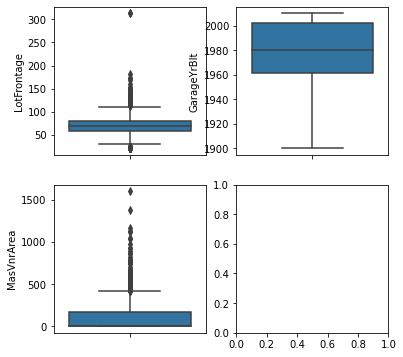

In [19]:
#Observation des variables continue via boxplot 
fig, axe = plt.subplots(2,2, figsize=(6,6))

for i in range(len(boxplot_uni)):
        nrow = i//2
        ncol = i%2
        ax = sns.boxplot(y = df[boxplot_uni[i]], ax=axe[nrow,ncol])

- Beaucoup d'outliers pour  **LotFrontage , MasVnrArea**. Remplacement par la **mediane**
- Peu d'outliers pour **GarageYrBlt** remplacement par la **moyenne**

In [20]:
#Remplacement des NaN par la moyenne ou mediane : 
for i in df[boxplot_uni]:
    if i == 'GarageYrBlt':
        moyenne =  df[i].mean()   
        df[i].fillna(moyenne, inplace = True)  
    else: 
        median = df[i].median()
        df[i].fillna(median, inplace = True)

In [21]:
df[boxplot_uni].isnull().sum()

LotFrontage    0
GarageYrBlt    0
MasVnrArea     0
dtype: int64

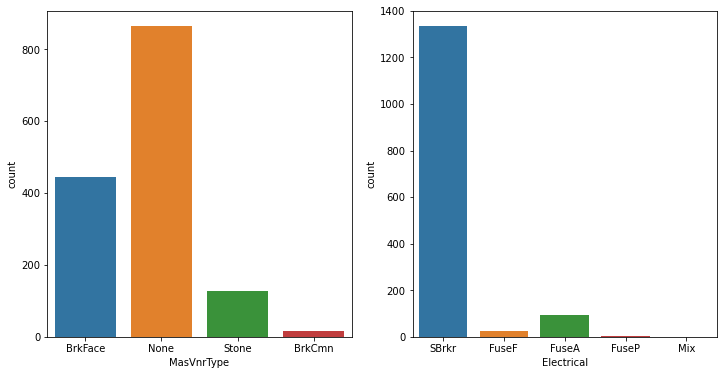

In [22]:
fig, axe = plt.subplots(1,2, figsize=(12,6))

for i in range(len(countplot_uni)):
        ax = sns.countplot(x = df[countplot_uni[i]], ax=axe[i])

Pour toutes les valeurs manquantes de chacune des ces variables, on remplacera par **le mode**

In [23]:
#Remplacement des NaN par le mode : 
for i in df[countplot_uni]:
    mode = df[i].value_counts().idxmax()  #recuperation de la valeur la plus représentée par colonne (=mode)
    df[i].fillna(mode, inplace = True) #remplacement de cette valeur pour la colonne en question

In [24]:
df[countplot_uni].isnull().sum()

MasVnrType    0
Electrical    0
dtype: int64

Maintenant qu'on a supprimer des colonnes sur notre dataframe et qu'on a comblés les données manquantes, on va pouvoir le **rescinder en deux** avec les variables categoriques/discrètes d'un côté et les variables continues de l'autre : 

In [25]:
#recuperation des variables categoriques : 
var_categorique = []
for i in df:
    if df[i].nunique() <30 :
        var_categorique.append(i)
#recuperation des variables continues : 
var_continue = []
for i in df:
    if df[i].nunique() >=30 :
        var_continue.append(i)

In [26]:
print("nb variable categorique :", len(var_categorique))
print("nb variable continue :", len(var_continue))

nb variable categorique : 61
nb variable continue : 20


# 2. Analyse bi-variée entre la target et les features

La **target** est de type **quantitative continues**

- Rappel : 
    - Analyse entre 2 variables continues : **correlation**
    - Analyse entre une variable continue et une variable qualitative : **Boxplot**

In [27]:
target = df.SalePrice

## 2.1 SalePrice vs continues :
Entre deux variables continues, on utilise le test de corrélation :

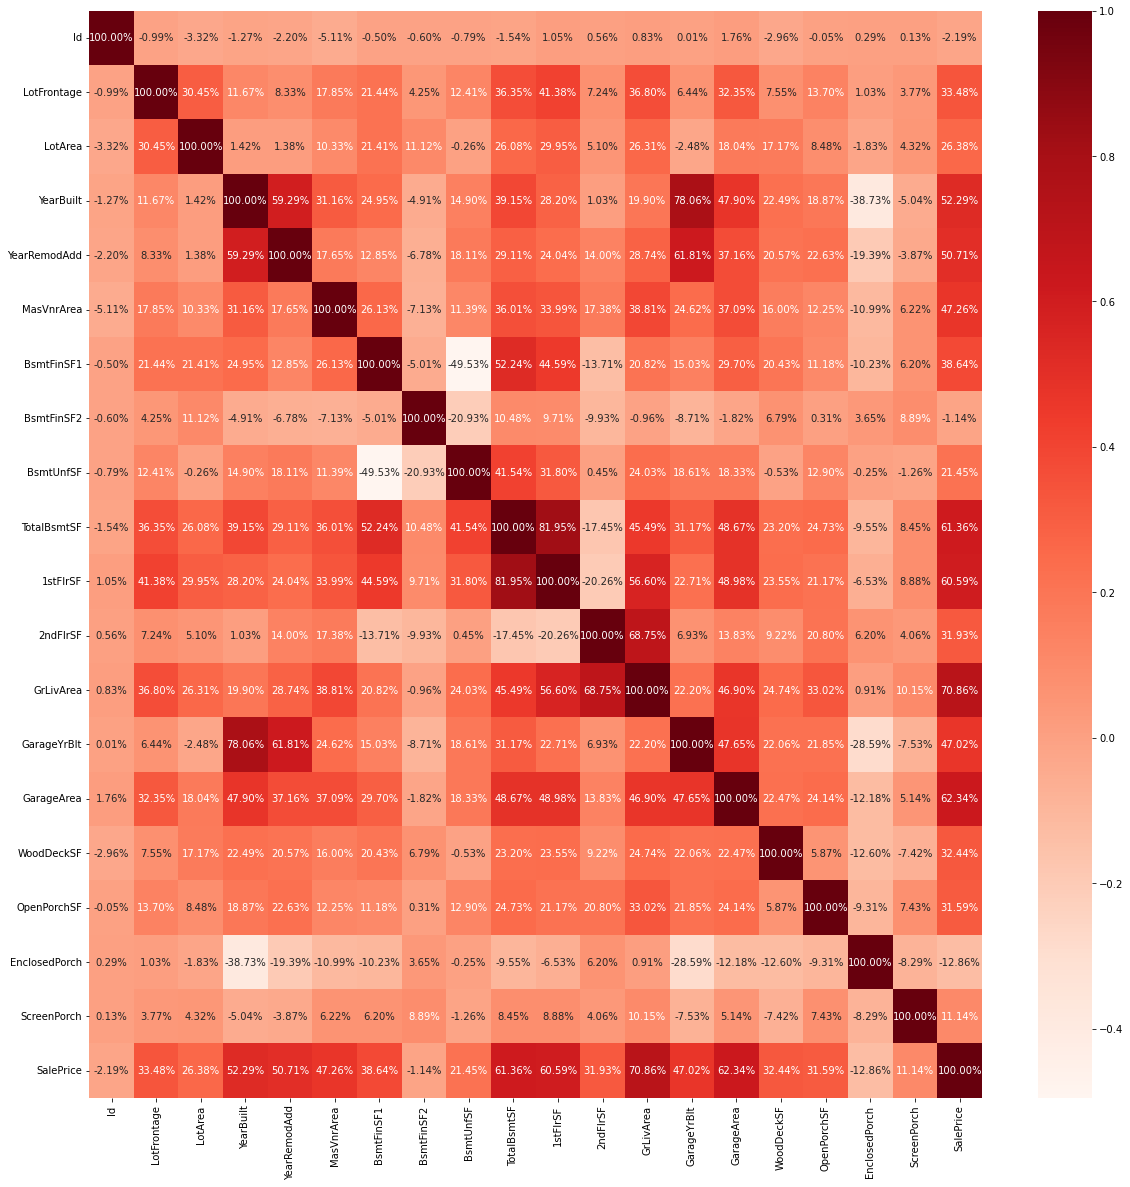

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(df[var_continue].corr(), annot = True, fmt = '.2%', cmap = "Reds")
plt.show()

In [29]:
correlation = df[var_continue].corr().unstack()

In [30]:
correlation_forte = correlation[(abs(correlation)>=0.5) & (abs(correlation)<1)]
correlation_forte

YearBuilt     YearRemodAdd    0.592855
              GarageYrBlt     0.780555
              SalePrice       0.522897
YearRemodAdd  YearBuilt       0.592855
              GarageYrBlt     0.618130
              SalePrice       0.507101
BsmtFinSF1    TotalBsmtSF     0.522396
TotalBsmtSF   BsmtFinSF1      0.522396
              1stFlrSF        0.819530
              SalePrice       0.613581
1stFlrSF      TotalBsmtSF     0.819530
              GrLivArea       0.566024
              SalePrice       0.605852
2ndFlrSF      GrLivArea       0.687501
GrLivArea     1stFlrSF        0.566024
              2ndFlrSF        0.687501
              SalePrice       0.708624
GarageYrBlt   YearBuilt       0.780555
              YearRemodAdd    0.618130
GarageArea    SalePrice       0.623431
SalePrice     YearBuilt       0.522897
              YearRemodAdd    0.507101
              TotalBsmtSF     0.613581
              1stFlrSF        0.605852
              GrLivArea       0.708624
              GarageArea 

Regardons les corrélations les plus fortes ou notre target est impliquée :

In [31]:
abs(correlation_forte['SalePrice']).sort_values(ascending=False)

GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
dtype: float64

### Conclusion : 

On ne va garder que ces 6 variables qui possèdent les corrélations les plus fortes 

In [32]:
#tri des variables continues : 
var_continue = list(correlation_forte['SalePrice'].index)

In [33]:
var_continue

['YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageArea']

## 2.2 SalePrice vs variable categorique et discrètes :
Entre une variable categorique/discrete vs une continue  on utilise le boxplot : 

In [34]:
df[var_categorique].shape[1]

61

Comme il y a 61 variables a affichés, pour des raisons pratiques, on va rescinder variable categoriques en 4 parties :

In [35]:
var_cat1 = df[var_categorique].iloc[:,:16]
var_cat2 = df[var_categorique].iloc[:,16:32]
var_cat3 = df[var_categorique].iloc[:,32:48]
var_cat4= df[var_categorique].iloc[:,48:]

var_cat1


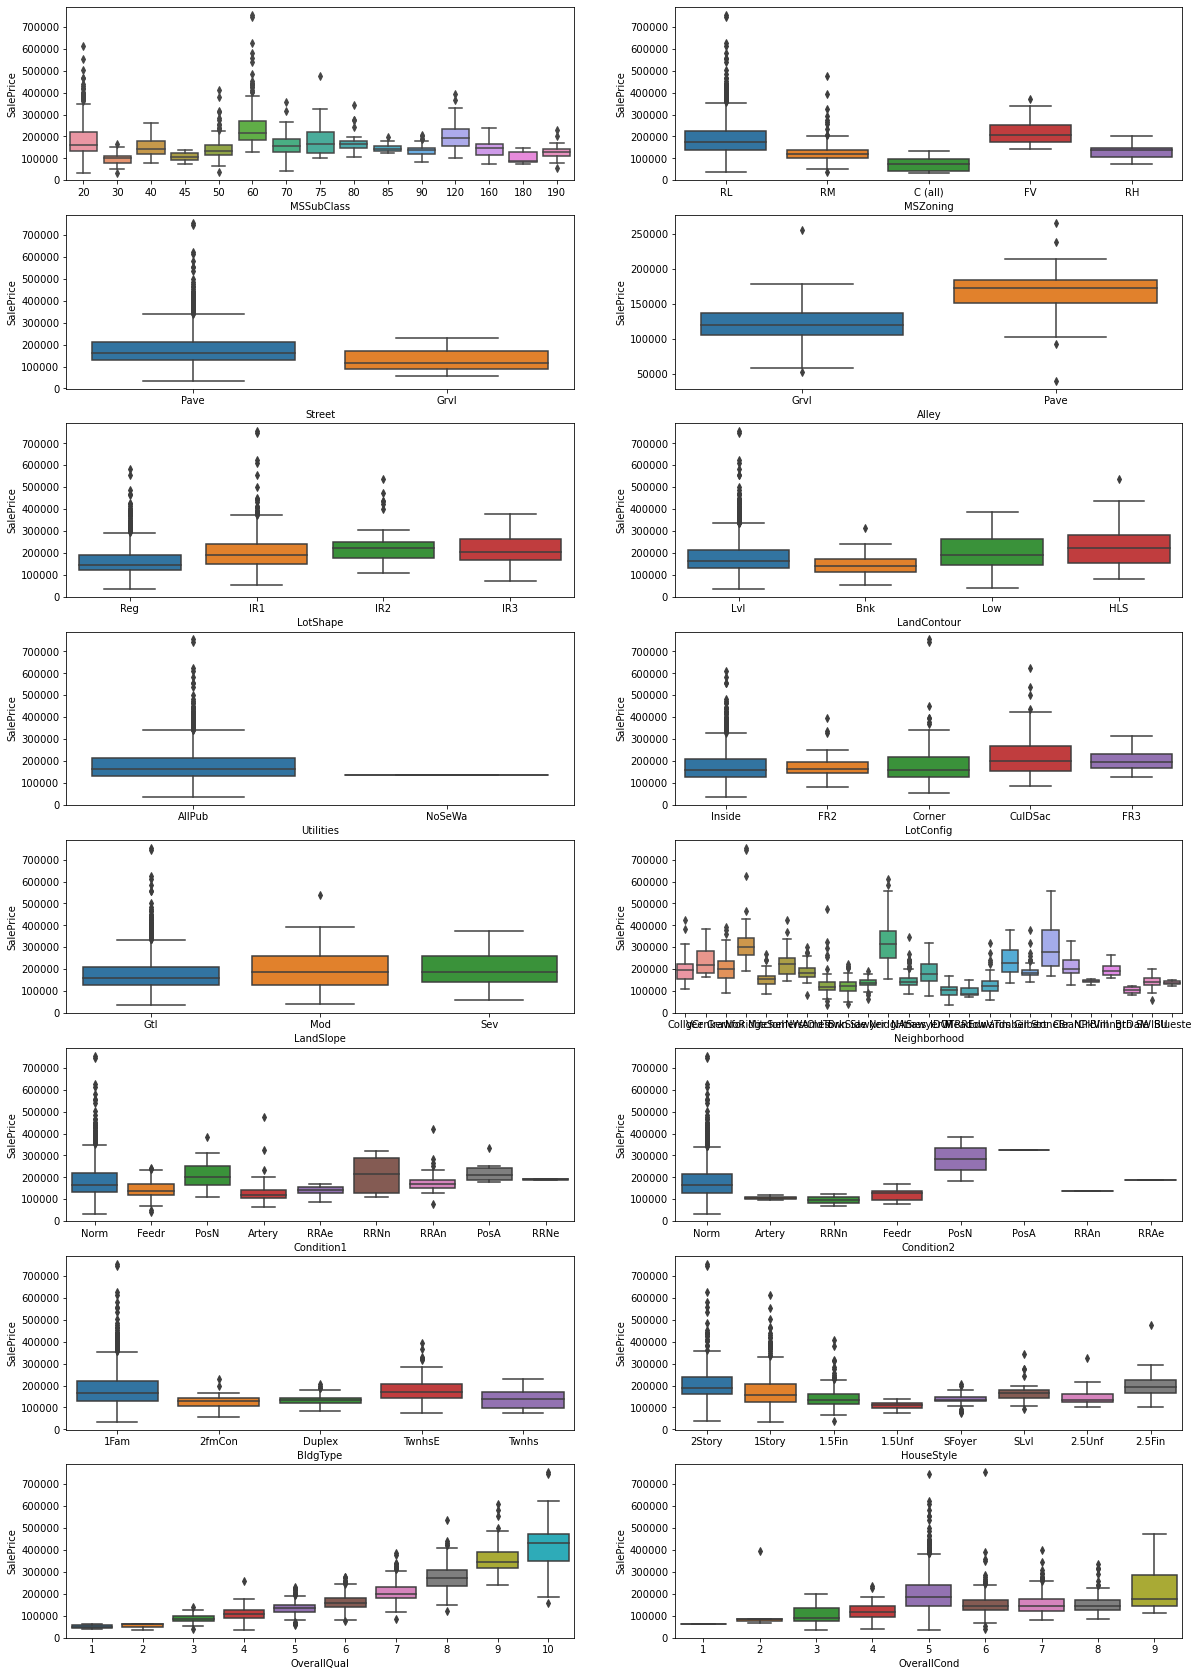

In [36]:
fig, axe = plt.subplots(8,2, figsize=(20,30))
print('var_cat1')
for i in range(len(var_cat1.columns)):
        nrow = i//2
        ncol = i%2   
        ax = sns.boxplot(var_cat1[var_cat1.columns[i]], target,  ax = axe[nrow,ncol])


**Observations :**

- Faible variation de la mediane pour : **Utilities**. On accepte l'hypothèse H1 (indépendance des variables) et on rejette H0 (dépendances des variables).

- A l'exception d'Utilities, on peut tout garder car les medianes varient pour chaque variable. Donc on accepte l'hypothese H0 (dépendance des variables) et on rejette H1 (indépendances des variables).

var_cat2


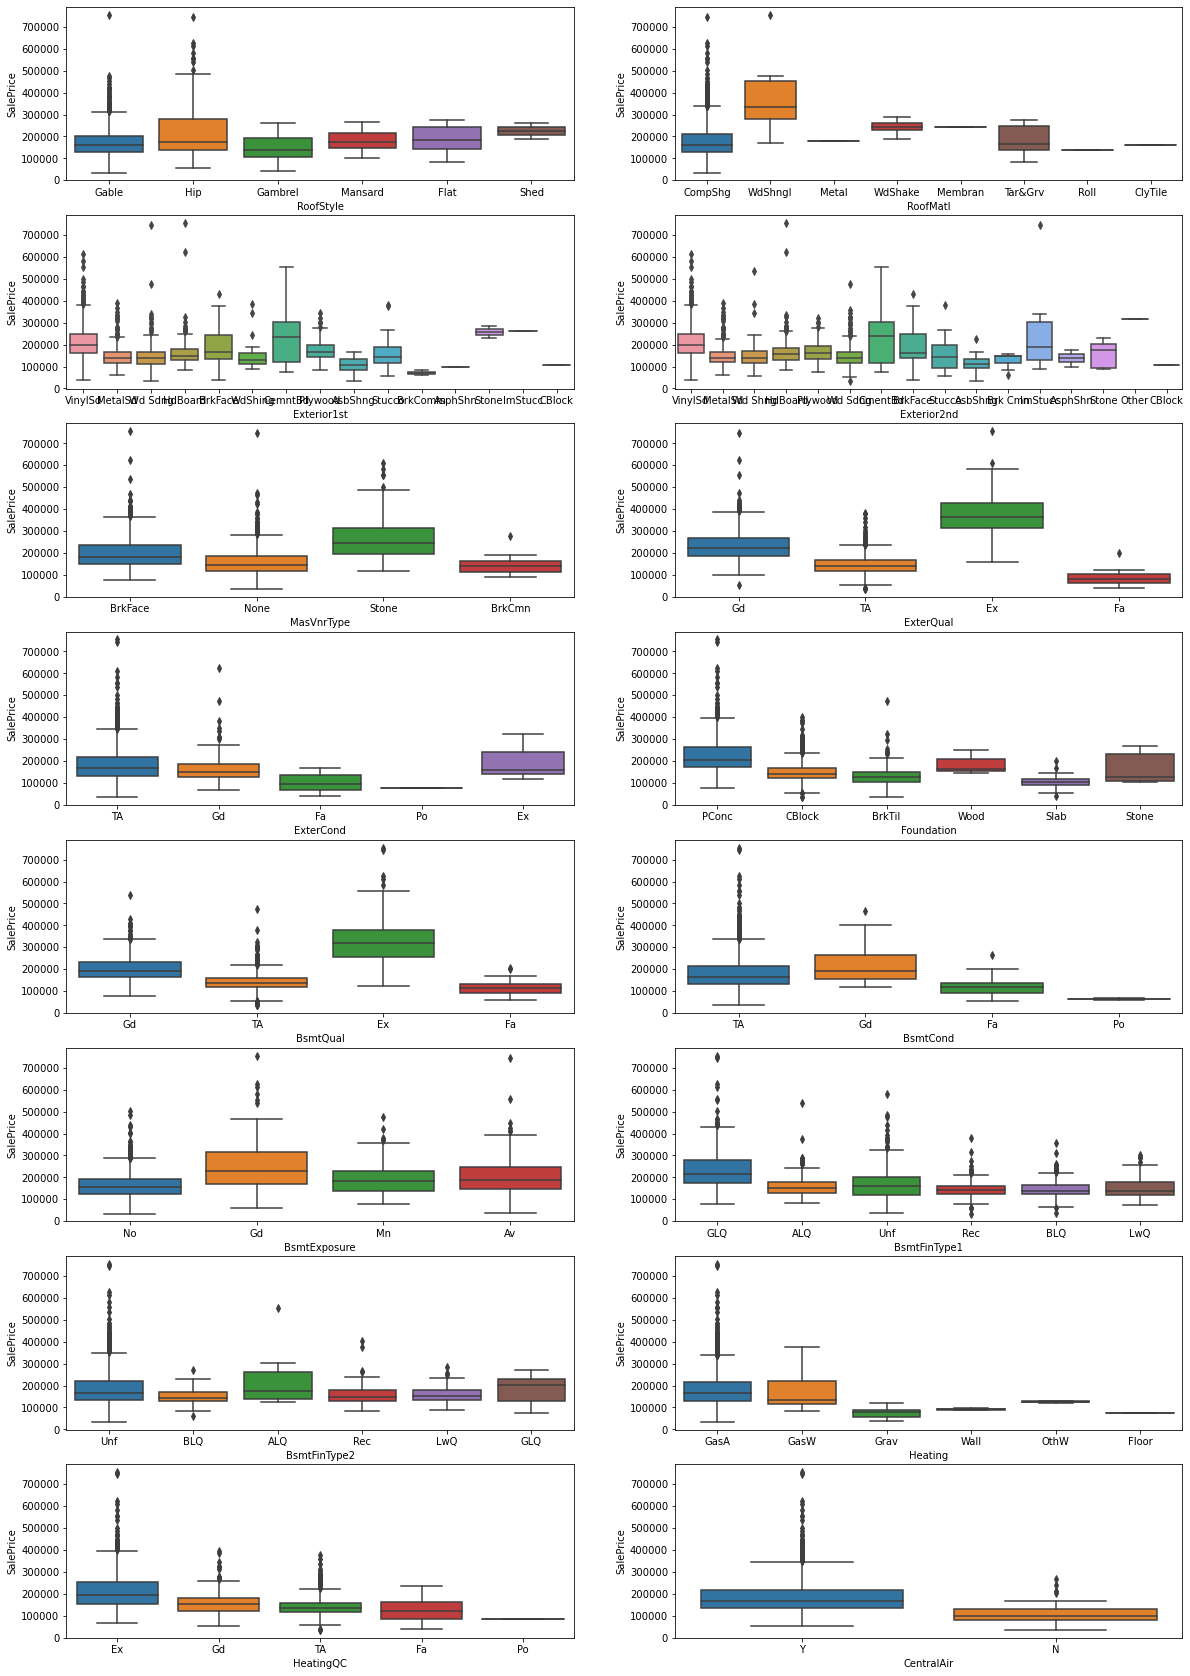

In [37]:
fig, axe = plt.subplots(8,2, figsize=(20,30))
print('var_cat2')

for i in range(len(var_cat2.columns)):
        nrow = i//2
        ncol = i%2   
        ax = sns.boxplot(var_cat2[var_cat2.columns[i]], target,  ax = axe[nrow,ncol])

**Observations :**

- On peut tout garder car les medianes varient pour chaque variable.
Donc on accepte l'hypothese H0 (dépendance des variables) et on rejette H1 (indépendances des variables).

var_cat3


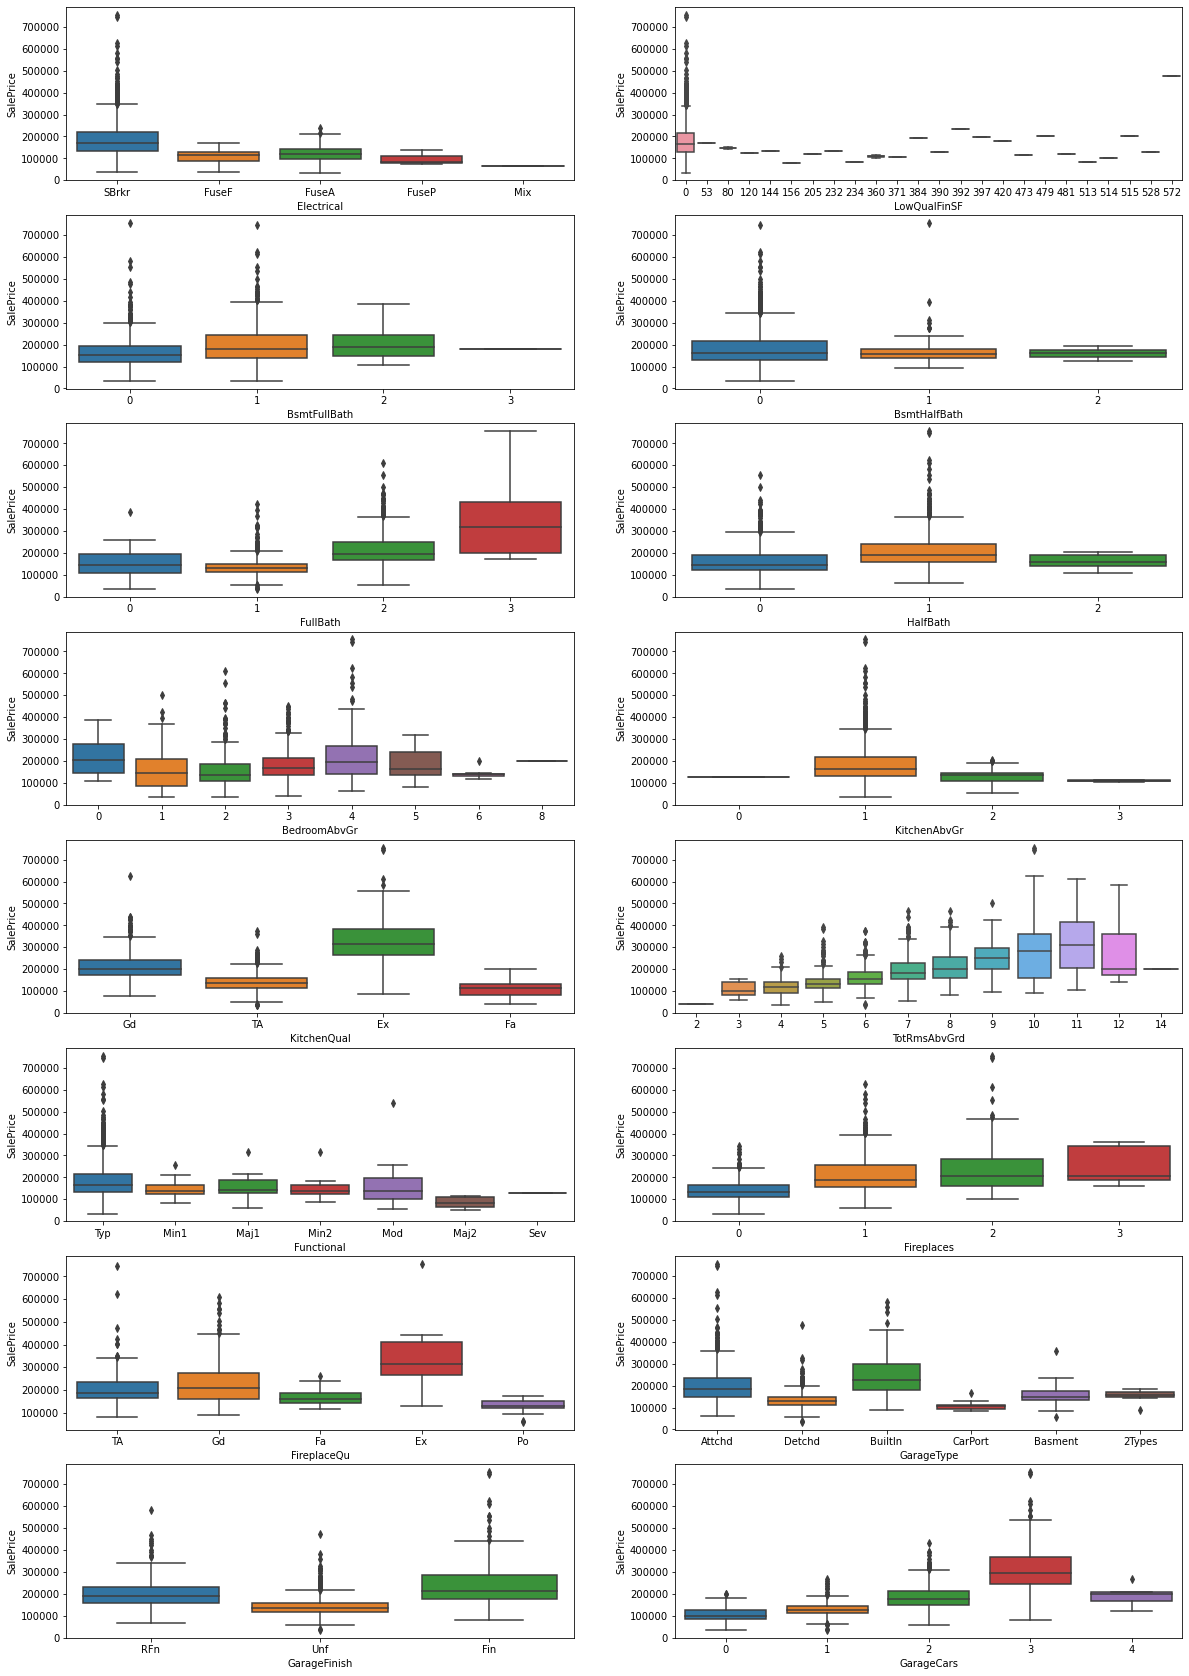

In [38]:
fig, axe = plt.subplots(8,2, figsize=(20,30))
print('var_cat3')

for i in range(len(var_cat3.columns)):
        nrow = i//2
        ncol = i%2   
        ax = sns.boxplot(var_cat3[var_cat3.columns[i]], target,  ax = axe[nrow,ncol])

**Observations :**

- Pour la variable **LowQualFinSF** : la valeur 0 apparait  1434 fois, toutes les autres valeurs n'apparaissent qu'une seule fois.
- Faible variation de la mediane pour : **BsmtHalfBath**. on accepte l'hypothèse H1 (indépendance des variables) et on rejette H0 (dépendances des variables).

- Pour le reste, on peut tout garder car les medianes varient pour chaque variable. Donc on accepte l'hypothese H0 (dépendance des variables) et on rejette H1 (indépendances des variables).

var_cat4


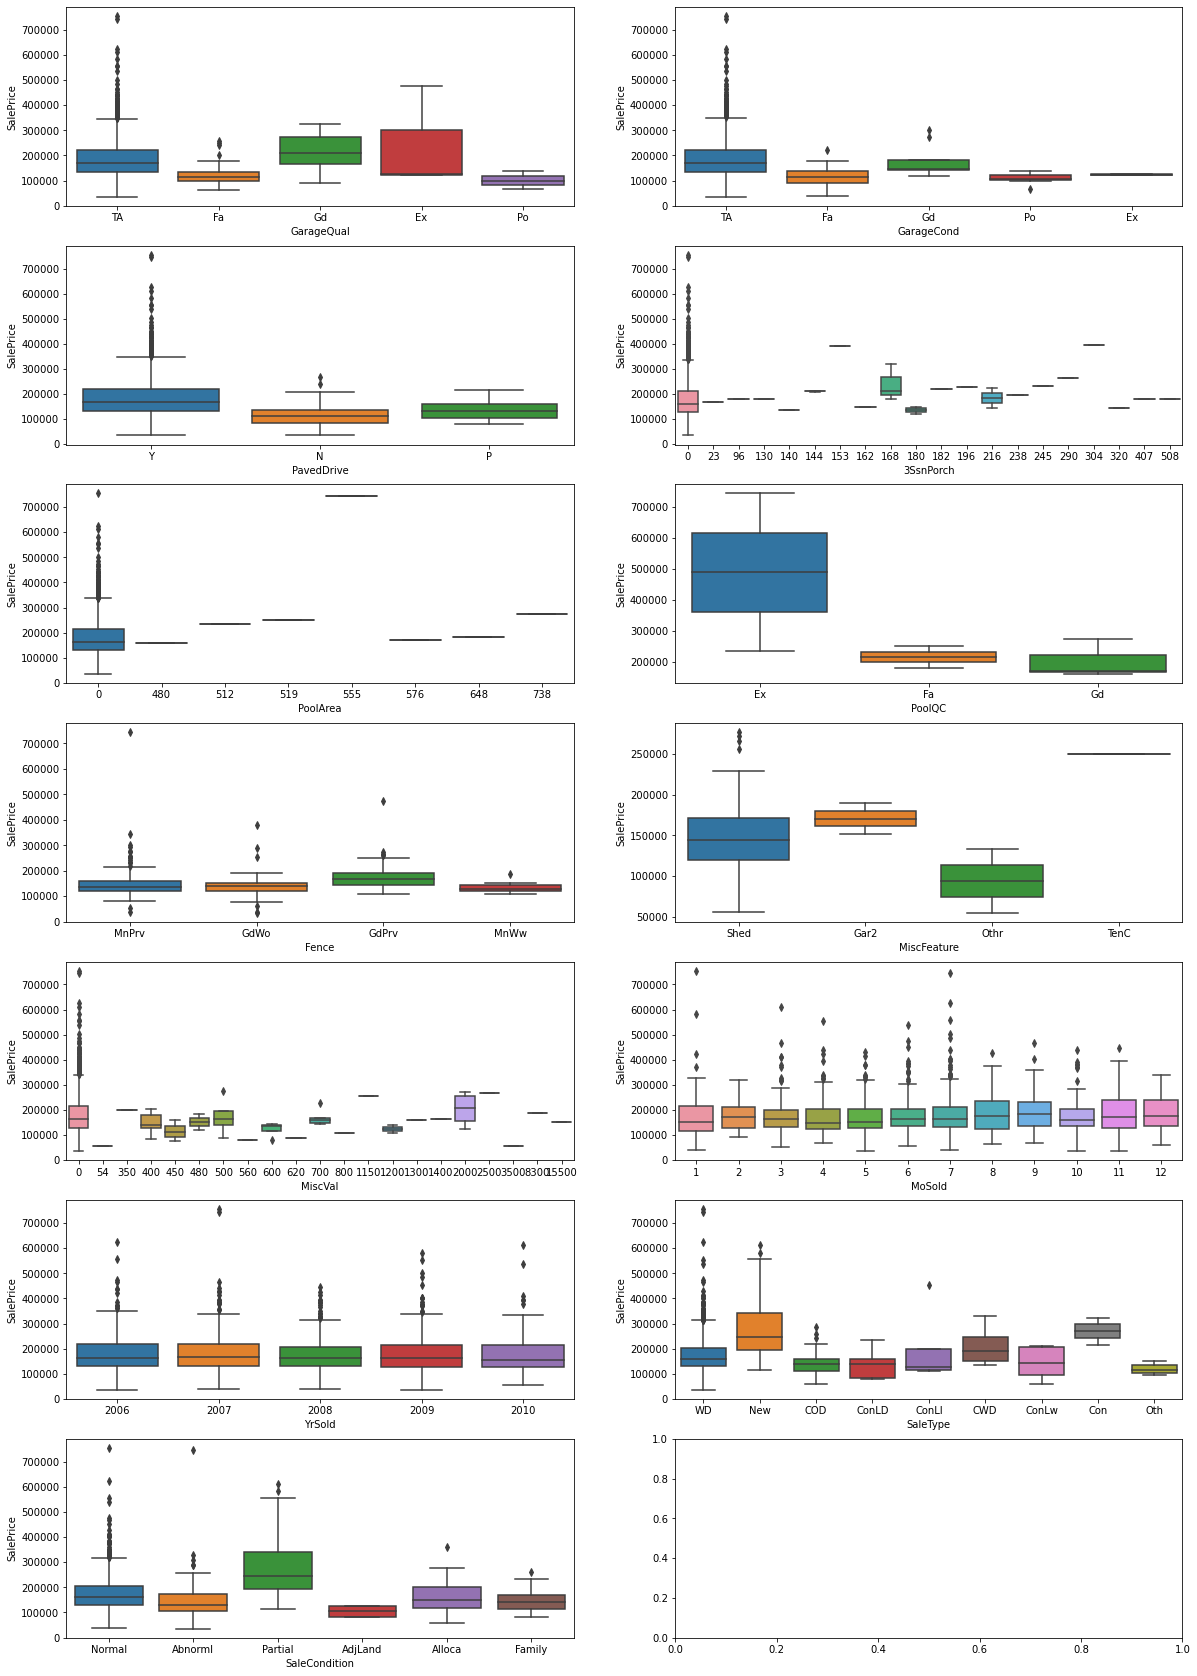

In [39]:
fig, axe = plt.subplots(7,2, figsize=(20,30))
print('var_cat4')

for i in range(len(var_cat4.columns)):
        nrow = i//2
        ncol = i%2   
        ax = sns.boxplot(var_cat4[var_cat4.columns[i]], target,  ax = axe[nrow,ncol])

**Observations :**

- Pour la variable **3SsnPorch**, **PoolArea** : Déséquilibre dans la répartition de l’échantillon
- Faible variation de la mediane pour : **MoSold**, **YrSold** , on accepte l'hypothèse H1 (indépendance des variables) et on rejette H0 (dépendances des variables).

- Pour le reste, on accepte l'hypothese H0 (dépendance des variables) et on rejette H1 (indépendances des variables).


# Remarque : 
- On peut aussi faire un test statistique adapté : ANOVA,Student, etc. (cf : https://www.qualtrics.com/fr/gestion-de-l-experience/etude-marche/analyse-variance/) comme le test de corrélation lorsqu'on rencontre 2 variable continues ou le test khi2 pour 2 variables categoriques.

In [40]:
#liste des variables categoriques que l'on veut supprimer
var_categorique_supprime = ['Utilities', 'LowQualFinSF','BsmtHalfBath','3SsnPorch','PoolArea','MoSold','YrSold']

In [41]:
#variable categorique que l'on garde : 
var_categorique = [col for col in var_categorique if col not in var_categorique_supprime]

### Recuperation du df contenant uniquement var_continue et var_categorique : 

In [42]:
var_a_garder = var_continue + var_categorique

In [43]:
df = df[var_a_garder] 
df.shape

(1460, 60)

## 3. Encodage des données

Il faut aussi encoder les NaN que nous avons gardé, car n'oublions pas ici que le NaN est une information et signifie l'absence d'un element pour une maison.
* Exemple Alley = Nan signifie qu'il n'y a pas d'allée.
* on va remplacer NaN par "NaN" ca permettra d'avoir des données de même types (str) et sera compatible a l'encodage

In [44]:
#remplacement des NaN par "NaN" :
df[Var_NA] = df[Var_NA].fillna("NaN")
df[Var_NA].head(5)

,Alley,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NaN,Gd,TA,No,GLQ,Unf,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN
1,NaN,Gd,TA,Gd,ALQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
2,NaN,Gd,TA,Mn,GLQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
3,NaN,TA,Gd,No,ALQ,Unf,Gd,Detchd,Unf,TA,TA,NaN,NaN,NaN
4,NaN,Gd,TA,Av,GLQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN


In [45]:
#recuperation des variables a encoder  revient a recuperer toutes les variables pour lequel le dtypes = object
var_a_encoder = df[var_categorique].dtypes[df[var_categorique].dtypes == 'object'].index

In [46]:
var_a_encoder

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [47]:
#on verifie que toutes les variables recuperer ne sont pas des variables discrètes de type object :
df[var_a_encoder].head()

,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [48]:
# Verifions que les variables restantes sont bien des variables discretes :
var_discrete = [col for col in var_categorique if col not in var_a_encoder]
df[var_discrete].head(3)
#on voit bien qu'on a bien separer les variables qualitatives des variables discretes

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MiscVal
0,60,7,5,1,2,1,3,1,8,0,2,0
1,20,6,8,0,2,0,3,1,6,1,2,0
2,60,7,5,1,2,1,3,1,6,1,2,0


In [49]:
#Encodage des variables :
encodage = OrdinalEncoder()
df[var_a_encoder] = encodage.fit_transform(df[var_a_encoder])

In [50]:
df[var_categorique].head(3)
#On voit que les variables qualitatives ont bien été encodées

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition
0,60,3.0,1.0,1.0,3.0,3.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,4.0,4.0,2.0,6.0,1.0,0.0,1.0,4.0,1,2,1,3,1,2.0,8,6.0,0,3.0,1.0,2.0,2,5.0,5.0,2.0,3.0,4.0,1.0,0,8.0,4.0
1,20,3.0,1.0,1.0,3.0,3.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,6,8,1.0,1.0,8.0,8.0,2.0,3.0,4.0,1.0,2.0,4.0,1.0,0.0,6.0,1.0,0.0,1.0,4.0,0,2,0,3,1,3.0,6,6.0,1,5.0,1.0,2.0,2,5.0,5.0,2.0,3.0,4.0,1.0,0,8.0,4.0
2,60,3.0,1.0,1.0,0.0,3.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,4.0,2.0,2.0,6.0,1.0,0.0,1.0,4.0,1,2,1,3,1,2.0,6,6.0,1,5.0,1.0,2.0,2,5.0,5.0,2.0,3.0,4.0,1.0,0,8.0,4.0


Pour résumer : 
- Var_categorique = var_discrete + var_a_encoder

## 4. Séparation des données en train et test 

#### Remarque : 
- Ici on a fait le choix de splitter avec train_test_split, donc lorsqu'on va normaliser c'est en fonction du **train**.

- Mais on aurait pu utiliser la méthode Kfold ainsi l'ensemble du jeu de donnée serait a la fois le test et le train, séparer en n parties (cv = n) dont on choisis le nombre de split.

- En utilisant Kfold, on a pu besoin de normaliser en fonction du train, on normalise **sur la colonne complète**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size= 0.2, random_state=42)

In [52]:
X_train

,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition
254,1957,1957,1314,1314,1314,294,20,3.0,1.0,1.0,3.0,3.0,4.0,0.0,12.0,2.0,2.0,0.0,2.0,5,6,1.0,1.0,8.0,8.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0,5.0,6.0,1.0,4.0,1.0,4.0,1,1,0,3,1,3.0,5,6.0,0,3.0,1.0,2.0,1,5.0,5.0,2.0,3.0,4.0,1.0,0,8.0,4.0
1066,1993,1994,799,799,1571,380,60,3.0,1.0,1.0,0.0,3.0,4.0,0.0,8.0,2.0,2.0,0.0,5.0,6,7,1.0,1.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,4.0,4.0,6.0,6.0,1.0,2.0,1.0,4.0,0,2,1,3,1,3.0,7,6.0,1,5.0,1.0,2.0,2,5.0,5.0,2.0,3.0,4.0,1.0,0,8.0,4.0
638,1910,1950,796,796,796,0,30,3.0,1.0,1.0,3.0,3.0,4.0,0.0,7.0,1.0,2.0,0.0,2.0,5,7,1.0,1.0,8.0,14.0,2.0,3.0,4.0,1.0,1.0,4.0,4.0,6.0,6.0,1.0,2.0,1.0,0.0,0,1,0,2,1,3.0,4,6.0,0,3.0,6.0,1.0,0,3.0,3.0,1.0,3.0,2.0,1.0,0,8.0,4.0
799,1937,1950,731,981,1768,240,50,3.0,1.0,1.0,3.0,3.0,0.0,0.0,18.0,1.0,2.0,0.0,0.0,5,7,1.0,1.0,13.0,14.0,1.0,3.0,4.0,0.0,2.0,4.0,4.0,0.0,6.0,1.0,0.0,1.0,4.0,1,1,1,3,1,2.0,7,6.0,2,5.0,5.0,3.0,1,5.0,5.0,2.0,3.0,2.0,1.0,0,8.0,4.0
380,1924,1950,1026,1026,1691,308,50,3.0,1.0,2.0,3.0,3.0,4.0,0.0,18.0,2.0,2.0,0.0,0.0,5,6,1.0,1.0,3.0,14.0,2.0,3.0,4.0,0.0,4.0,4.0,4.0,3.0,6.0,1.0,4.0,1.0,4.0,0,2,0,3,1,2.0,6,6.0,1,2.0,5.0,3.0,1,5.0,5.0,2.0,3.0,4.0,1.0,0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2006,2006,1314,1314,1314,440,20,3.0,1.0,1.0,0.0,3.0,4.0,0.0,5.0,2.0,2.0,0.0,2.0,6,5,1.0,1.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,4.0,4.0,2.0,6.0,1.0,2.0,1.0,4.0,0,2,0,3,1,2.0,6,6.0,1,2.0,1.0,2.0,2,5.0,5.0,2.0,3.0,4.0,1.0,0,8.0,4.0
1130,1928,1950,1122,1328,1981,576,50,3.0,1.0,1.0,3.0,3.0,4.0,0.0,18.0,2.0,2.0,0.0,0.0,4,3,1.0,1.0,14.0,10.0,2.0,3.0,4.0,0.0,4.0,4.0,4.0,1.0,6.0,1.0,4.0,1.0,4.0,1,2,0,4,1,2.0,7,3.0,2,5.0,5.0,3.0,2,5.0,5.0,2.0,3.0,2.0,1.0,0,8.0,4.0
1294,1955,1990,864,864,864,572,20,3.0,1.0,1.0,3.0,3.0,4.0,0.0,7.0,2.0,2.0,0.0,2.0,5,7,3.0,1.0,14.0,10.0,2.0,3.0,4.0,1.0,4.0,4.0,4.0,5.0,6.0,1.0,4.0,1.0,4.0,1,1,0,2,1,3.0,5,6.0,0,3.0,5.0,3.0,2,5.0,5.0,0.0,3.0,4.0,1.0,0,8.0,4.0
860,1918,1998,912,912,1426,216,50,3.0,1.0,1.0,3.0,3.0,0.0,0.0,6.0,2.0,2.0,0.0,0.0,7,8,1.0,1.0,13.0,14.0,2.0,2.0,4.0,0.0,4.0,4.0,4.0,6.0,6.0,1.0,2.0,1.0,4.0,0,1,1,3,1,2.0,7,6.0,1,2.0,5.0,3.0,1,5.0,5.0,2.0,3.0,0.0,1.0,0,8.0,4.0


## 5. Normalisation des données : 

Ici on normalise avec train test split, ultérieurement et pour les projets à venir, il est préférable de faire de la cross validation (kfold) 

In [53]:
#normalisation du train : 
normalized_train = (X_train-X_train.mean())/X_train.std()
#normalisation du test : 
normalized_test = (X_test-X_train.mean())/X_train.std()

#### Remarque  :

On n'oublie pas de remettre les colonnes qui ne doivent pas etre normalisées : les colonnes contenant les **variables categoriques**

In [54]:
normalized_train[var_categorique] = X_train[var_categorique]
normalized_test[var_categorique] = X_test[var_categorique]

#### Verification des colonnes continues

In [55]:
normalized_train[var_continue].head(3)
#variables continues sont bien normalisée pour le train

,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea
254,-0.455274,-1.345487,0.572367,0.374075,-0.406919,-0.863467
1066,0.718301,0.439026,-0.596291,-0.957792,0.083135,-0.456069
638,-1.987442,-1.683097,-0.603099,-0.965550,-1.394653,-2.256203


In [56]:
normalized_test[var_continue].head(3)
#variables continues sont bien normalisée pour le test

,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea
892,-0.259678,0.873096,-0.006289,-0.262118,-0.875997,-1.005583
1105,0.750901,0.487256,0.910484,0.855099,2.087205,1.116680
413,-1.433253,-1.683097,-0.122020,-0.365564,-0.952270,-0.550813


#### Verification des colonnes categoriques (discrètes et qualitatives)  : 

In [57]:
normalized_train[var_categorique].head(3)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition
254,20,3.0,1.0,1.0,3.0,3.0,4.0,0.0,12.0,2.0,2.0,0.0,2.0,5,6,1.0,1.0,8.0,8.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0,5.0,6.0,1.0,4.0,1.0,4.0,1,1,0,3,1,3.0,5,6.0,0,3.0,1.0,2.0,1,5.0,5.0,2.0,3.0,4.0,1.0,0,8.0,4.0
1066,60,3.0,1.0,1.0,0.0,3.0,4.0,0.0,8.0,2.0,2.0,0.0,5.0,6,7,1.0,1.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,4.0,4.0,6.0,6.0,1.0,2.0,1.0,4.0,0,2,1,3,1,3.0,7,6.0,1,5.0,1.0,2.0,2,5.0,5.0,2.0,3.0,4.0,1.0,0,8.0,4.0
638,30,3.0,1.0,1.0,3.0,3.0,4.0,0.0,7.0,1.0,2.0,0.0,2.0,5,7,1.0,1.0,8.0,14.0,2.0,3.0,4.0,1.0,1.0,4.0,4.0,6.0,6.0,1.0,2.0,1.0,0.0,0,1,0,2,1,3.0,4,6.0,0,3.0,6.0,1.0,0,3.0,3.0,1.0,3.0,2.0,1.0,0,8.0,4.0


In [58]:
normalized_test[var_categorique].head(3)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition
892,20,3.0,1.0,1.0,3.0,3.0,4.0,0.0,19.0,2.0,2.0,0.0,2.0,6,8,3.0,1.0,6.0,6.0,2.0,3.0,4.0,1.0,4.0,4.0,4.0,2.0,6.0,1.0,4.0,1.0,4.0,0,1,0,3,1,3.0,6,6.0,0,3.0,1.0,2.0,1,5.0,5.0,2.0,3.0,2.0,1.0,0,8.0,4.0
1105,60,3.0,1.0,1.0,0.0,3.0,0.0,0.0,15.0,2.0,2.0,0.0,5.0,8,5,1.0,1.0,6.0,6.0,1.0,2.0,4.0,2.0,0.0,4.0,0.0,2.0,6.0,1.0,0.0,1.0,4.0,1,2,1,3,1,2.0,9,6.0,2,5.0,1.0,2.0,2,5.0,5.0,2.0,3.0,4.0,1.0,0,8.0,4.0
413,30,4.0,1.0,0.0,3.0,3.0,4.0,0.0,17.0,0.0,2.0,0.0,2.0,5,6,1.0,1.0,14.0,15.0,2.0,3.0,4.0,1.0,4.0,4.0,4.0,6.0,6.0,1.0,2.0,1.0,0.0,0,1,0,2,1,3.0,5,6.0,1,2.0,5.0,3.0,2,5.0,5.0,2.0,3.0,4.0,1.0,0,8.0,4.0


On voit que nos **variables continues** sont bien **normalisée** et nos **variables qualitatives/discrètes** sont **encodées**

In [59]:
normalized_train.head(3)

,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition
254,-0.455274,-1.345487,0.572367,0.374075,-0.406919,-0.863467,20,3.0,1.0,1.0,3.0,3.0,4.0,0.0,12.0,2.0,2.0,0.0,2.0,5,6,1.0,1.0,8.0,8.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0,5.0,6.0,1.0,4.0,1.0,4.0,1,1,0,3,1,3.0,5,6.0,0,3.0,1.0,2.0,1,5.0,5.0,2.0,3.0,4.0,1.0,0,8.0,4.0
1066,0.718301,0.439026,-0.596291,-0.957792,0.083135,-0.456069,60,3.0,1.0,1.0,0.0,3.0,4.0,0.0,8.0,2.0,2.0,0.0,5.0,6,7,1.0,1.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,4.0,4.0,6.0,6.0,1.0,2.0,1.0,4.0,0,2,1,3,1,3.0,7,6.0,1,5.0,1.0,2.0,2,5.0,5.0,2.0,3.0,4.0,1.0,0,8.0,4.0
638,-1.987442,-1.683097,-0.603099,-0.965550,-1.394653,-2.256203,30,3.0,1.0,1.0,3.0,3.0,4.0,0.0,7.0,1.0,2.0,0.0,2.0,5,7,1.0,1.0,8.0,14.0,2.0,3.0,4.0,1.0,1.0,4.0,4.0,6.0,6.0,1.0,2.0,1.0,0.0,0,1,0,2,1,3.0,4,6.0,0,3.0,6.0,1.0,0,3.0,3.0,1.0,3.0,2.0,1.0,0,8.0,4.0


In [60]:
normalized_test.head(3)

,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition
892,-0.259678,0.873096,-0.006289,-0.262118,-0.875997,-1.005583,20,3.0,1.0,1.0,3.0,3.0,4.0,0.0,19.0,2.0,2.0,0.0,2.0,6,8,3.0,1.0,6.0,6.0,2.0,3.0,4.0,1.0,4.0,4.0,4.0,2.0,6.0,1.0,4.0,1.0,4.0,0,1,0,3,1,3.0,6,6.0,0,3.0,1.0,2.0,1,5.0,5.0,2.0,3.0,2.0,1.0,0,8.0,4.0
1105,0.750901,0.487256,0.910484,0.855099,2.087205,1.116680,60,3.0,1.0,1.0,0.0,3.0,0.0,0.0,15.0,2.0,2.0,0.0,5.0,8,5,1.0,1.0,6.0,6.0,1.0,2.0,4.0,2.0,0.0,4.0,0.0,2.0,6.0,1.0,0.0,1.0,4.0,1,2,1,3,1,2.0,9,6.0,2,5.0,1.0,2.0,2,5.0,5.0,2.0,3.0,4.0,1.0,0,8.0,4.0
413,-1.433253,-1.683097,-0.122020,-0.365564,-0.952270,-0.550813,30,4.0,1.0,0.0,3.0,3.0,4.0,0.0,17.0,0.0,2.0,0.0,2.0,5,6,1.0,1.0,14.0,15.0,2.0,3.0,4.0,1.0,4.0,4.0,4.0,6.0,6.0,1.0,2.0,1.0,0.0,0,1,0,2,1,3.0,5,6.0,1,2.0,5.0,3.0,2,5.0,5.0,2.0,3.0,4.0,1.0,0,8.0,4.0


## 6. Modelling mise en place du model : 
### 6.1 KNN : 

- Sans modifier les hypers parametres :

In [61]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(normalized_train,y_train)
y_pred = knn.predict(normalized_test)

In [62]:
mse = mean_squared_error(y_true = y_test, y_pred=y_pred)
rmse = np.sqrt(mse)
print("On arrive a prédire la target avec une variation de ", round(rmse,2), "$")

On arrive a prédire la target avec une variation de  42129.49 $


#### Amelioration du modèles  grâce à GridSearchCV :

In [63]:
k = np.arange(2,50)
param_grid = {"n_neighbors":k,
              "metric":["euclidean","manhattan","minkowski"]
             }

In [64]:
grid = GridSearchCV(estimator=KNeighborsRegressor(),
                    param_grid=param_grid,  
                    scoring="neg_mean_squared_error")

In [65]:
grid.fit(normalized_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='neg_mean_squared_error')

In [66]:
best_model_knn = grid.best_estimator_
best_model_knn

KNeighborsRegressor(metric='manhattan', n_neighbors=3)

In [67]:
y_pred = best_model_knn.predict(normalized_test)

In [68]:
mse = mean_squared_error(y_true = y_test, y_pred=y_pred)
best_rmse_knn = np.sqrt(mse)

In [69]:
print("Maintenant, on arrive a prédire la target avec une variation de ", round(best_rmse_knn,2), "$")
print("Soit une diminution de la distance de ", round(rmse-best_rmse_knn,2))


Maintenant, on arrive a prédire la target avec une variation de  35907.0 $
Soit une diminution de la distance de  6222.49


### 6.2 Linéaire Regression :

- Testons sans modifier les hypers parametres :

In [70]:
Linear = LinearRegression()
Linear.fit(normalized_train, y_train)
y_pred = Linear.predict(normalized_test)

In [71]:
mse_LR = mean_squared_error(y_true = y_test, y_pred=y_pred)
rmse_LR = np.sqrt(mse_LR)
print("Avec la LogisticRegression, on arrive a prédire la target avec une variation de ", round(rmse_LR,2), "$")
print("Soit une diminution supplémentaire de la distance  ",round(best_rmse_knn-rmse_LR,2),"$")
#on a une nette amélioration avec la LogisticRegression que KNNRegressor sans même tuner les hypers parametres

Avec la LogisticRegression, on arrive a prédire la target avec une variation de  35076.78 $
Soit une diminution supplémentaire de la distance   830.22 $


**Conclusion :**

- La Regression linéaire effectuer de meilleures predictions a 35.000$ près

#### Si on souhaite afficher la droite de regression qui prédit nos données :

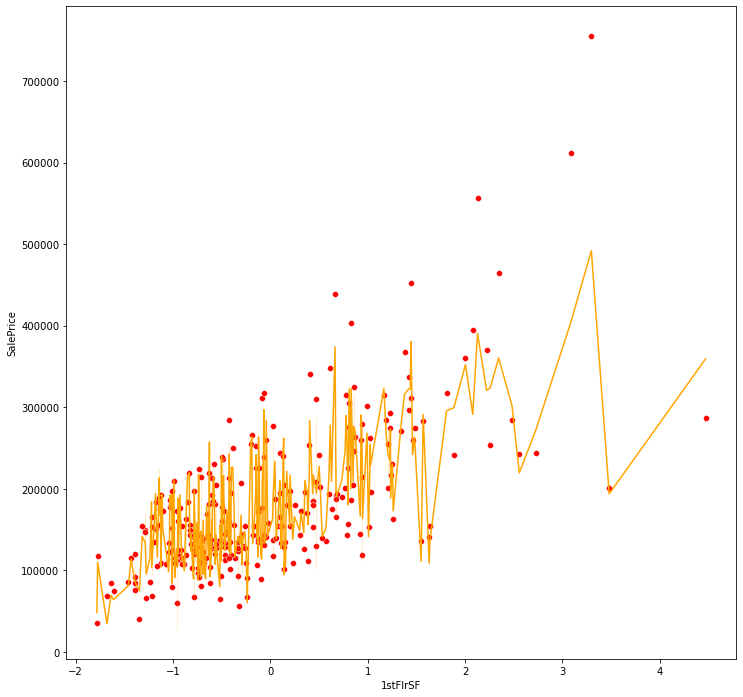

In [72]:
plt.figure(figsize=(12,12))
sns.scatterplot(x = normalized_test.iloc[:,3], y = y_test, color = "red")
sns.lineplot(x = normalized_test.iloc[:,3], y = y_pred, color = "orange")
plt.show()

#  7. Axes d'amélioration du modèles :
Pour améliorer nos modèles, il y a plusieurs pistes à prendre : 

###  Feature Selection
- Au niveau de la sélection de features, on peut améliorer en selectionnant qu'un certains nombre de features rendant le scoring optimal :
    - **RFE** : 
        - Permet de faire un test entre target et features si **les deux** sont :
            - continues 
            - categoriques
        - Permet de faire un test entre target et features avec **un des deux numériques et l'autre catégorique.**
        
Ce qui va changer pour le RFE, c'est le modèle, en fonction des 3 cas décis ci-dessus on ne va pas utiliser le même modèle. Par exemple pour 2 variables continues on utilisera LinearRegression,  variables categoriques LogisticRegression, etc.

Lorsqu'on fait de la feature selection, on peut en même temps faire de la **cross validation** et du **Grid Search**


###  GridSearchCV
- On peut optimiser les hypers parametres du modèle à l'aide d'un GridSearchCV


###  Le split :
- On a utilisé le train_test_split mais on a une zone de test qui est **fixe**.
- En utilisant de la cross validation on peut améliorer notre modèle car on entraine notre modèle sur **l'ensemble** du jeu de données.



##### Autres améliorations possibles :
* Par exemple le type de normalisation,  Si on a utilisé une normalisation par ZScore, on peut essayer avec une MinMaxScaler.
* Le type d'encodage (OneHot pour une variable categoriques nominales) 


## 7.1 Amelioration via le  split : 

on va travailler avec en faisant de la cross validation plutot que le train test split : 

- On recupere le code a partir de l'étape **4. Séparation des données en train et test.**  ( a ce moment là nos données sont encodées mais non normalisées)
- On normalise sur **TOUT** le jeu de données
- et on refait le modelling

In [73]:
#Recuperation de notre dataframe et on en fait une copie :
data = df.copy()

In [74]:
data.head(3)

,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition
0,2003,2003,856,856,1710,548,60,3.0,1.0,1.0,3.0,3.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,4.0,4.0,2.0,6.0,1.0,0.0,1.0,4.0,1,2,1,3,1,2.0,8,6.0,0,3.0,1.0,2.0,2,5.0,5.0,2.0,3.0,4.0,1.0,0,8.0,4.0
1,1976,1976,1262,1262,1262,460,20,3.0,1.0,1.0,3.0,3.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,6,8,1.0,1.0,8.0,8.0,2.0,3.0,4.0,1.0,2.0,4.0,1.0,0.0,6.0,1.0,0.0,1.0,4.0,0,2,0,3,1,3.0,6,6.0,1,5.0,1.0,2.0,2,5.0,5.0,2.0,3.0,4.0,1.0,0,8.0,4.0
2,2001,2002,920,920,1786,608,60,3.0,1.0,1.0,0.0,3.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,4.0,2.0,2.0,6.0,1.0,0.0,1.0,4.0,1,2,1,3,1,2.0,6,6.0,1,5.0,1.0,2.0,2,5.0,5.0,2.0,3.0,4.0,1.0,0,8.0,4.0


### A. Normalisation :

In [75]:
data[var_continue] = (data[var_continue]-data[var_continue].mean())/data[var_continue].std()

In [76]:
data.head(3)

,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition
0,1.050634,0.878367,-0.459145,-0.793162,0.370207,0.35088,60,3.0,1.0,1.0,3.0,3.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,4.0,4.0,2.0,6.0,1.0,0.0,1.0,4.0,1,2,1,3,1,2.0,8,6.0,0,3.0,1.0,2.0,2,5.0,5.0,2.0,3.0,4.0,1.0,0,8.0,4.0
1,0.156680,-0.429430,0.466305,0.257052,-0.482347,-0.06071,20,3.0,1.0,1.0,3.0,3.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,6,8,1.0,1.0,8.0,8.0,2.0,3.0,4.0,1.0,2.0,4.0,1.0,0.0,6.0,1.0,0.0,1.0,4.0,0,2,0,3,1,3.0,6,6.0,1,5.0,1.0,2.0,2,5.0,5.0,2.0,3.0,4.0,1.0,0,8.0,4.0
2,0.984415,0.829930,-0.313261,-0.627611,0.514836,0.63151,60,3.0,1.0,1.0,0.0,3.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,4.0,2.0,2.0,6.0,1.0,0.0,1.0,4.0,1,2,1,3,1,2.0,6,6.0,1,5.0,1.0,2.0,2,5.0,5.0,2.0,3.0,4.0,1.0,0,8.0,4.0


### B. Creation des modèles avec la cross_validation :

### B.2 KNN : 

In [77]:
#Instanciation du nombre de split avec shuffle = True (rappel le shuffle permet d'avoir des données
#scindées en n_splits parts égales)
cross = KFold(n_splits=5, shuffle=True,random_state=42)

In [78]:
n_scores = cross_val_score(estimator=KNeighborsRegressor(), X = data, y=target, 
               cv=cross, scoring="neg_mean_squared_error")

In [79]:
rmse_knn = np.mean(abs(n_scores)**0.5)

In [80]:
# report performance
print("RMSE pour chaque split :", abs(n_scores)**0.5)
print("Soit un RMSE Moyen de  :", rmse_knn)

RMSE pour chaque split : [46164.78411445 45451.15100832 45821.90565999 46685.11607603
 37174.53122597]
Soit un RMSE Moyen de  : 44259.49761695167


In [81]:
print("Autrement dit, on arrive a prédire le prix d'une maison a", round(np.mean(abs(n_scores)**0.5),2), "$ près")

Autrement dit, on arrive a prédire le prix d'une maison a 44259.5 $ près


#### Amélioration du KNN avec Gridsearch : 

In [82]:
k = np.arange(2,50)
param_grid = {"n_neighbors":k,
              "metric":["euclidean","manhattan","minkowski"]
             }

In [83]:
grid = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid, 
                    cv = cross, scoring="neg_mean_squared_error" )

In [84]:
grid.fit(data,target)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='neg_mean_squared_error')

# Meilleur model KNN avec cross_validation combiné au GridSearch : 

In [85]:
best_knn_model = grid.best_estimator_
best_knn_model

KNeighborsRegressor(metric='manhattan', n_neighbors=4)

In [86]:
#utilisation du meilleur model dans le grid search :
best_n_scores = cross_val_score(best_knn_model, X = data, y=target, 
               cv=cross, scoring="neg_mean_squared_error")

In [87]:
rmse_grid = np.mean(abs(best_n_scores)**0.5)

In [88]:
# report performance
print("Soit un RMSE Moyen de  :", rmse_grid)

Soit un RMSE Moyen de  : 36168.78153824154


In [89]:
print("Amélioration grâce au grid de", round(rmse_knn-rmse_grid), "$")

Amélioration grâce au grid de 8091 $


### B.3 Regression Linéaire : 

In [90]:
n_score_lineaire = cross_val_score(estimator=LinearRegression(),
                                   X = data ,y = target, cv=5, scoring="neg_mean_squared_error")

In [91]:
n_score_lineaire

array([-6.51803898e+08, -1.23443866e+09, -1.24037887e+09, -8.78062198e+08,
       -2.11411518e+09])

In [92]:
rmse_RL = np.mean(abs(n_score_lineaire)**0.5)

In [93]:
rmse_RL

34299.13301981016

In [94]:
print("Amélioration grâce au grid de", round(rmse_grid-rmse_RL), "$ supplémentaire ")

Amélioration grâce au grid de 1870 $ supplémentaire 


### 7.2 Feature selection 

Notre 2eme type d'amélioration sera dans la selection de feature, en effet on va choisir le nombre de feature nous permettant de diminuer encore plus notre rmse. 

- Explication de la stratégie : 

    - Grâce a la fonction RFE on pourra selectionner un nombre de features optimal sur notre pool de départ (càd qu'après avoir selectionner un certain nombre de features grâce a notre analyse bi-variée, on va encore procéder à un trie supplémentaire de ces variables grâce à RFE). 

    - Cette selection des meilleures features se fera grâce au modèle de la régression linéaire.
    
## Au sein même du code de la feature selection, plusieurs choix s'offrent à nous : 
    - On peut récupérer le nom des meilleurs colonnes, et refaire un GridSearchCV avec KNN et trouver les hypers parametres pour obtenir un meilleur score
    - On peut réutiliser encore la régression linéaire avec les nouvelles colonnes selectionnées.
    


- Donc pour **résumer** les étapes a faire : 
    1. Selection des meilleures features grâce a une pipeline contenant RFE et le modèle qui nous aide a choisir les meilleures features (LinearRegression) 
    2. Utilisation de la cross validation avec les nouvelles features pour tenter d'obtenir un meilleur score.

In [95]:
#Le code ci-dessous permet d'obtenir le score en faisant varier le nombre de features :
#et de récupérer le meilleur modèle (score avec la valeur la plus proche de 0)
models_with_scores = {}
for i in range(1,len(data.columns)):
    # create pipeline
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
    model = LinearRegression()
    pipeline = Pipeline(steps=[('s',rfe),('m',model)])
    
    # evaluate model
    cv=KFold(n_splits=5)
    n_scores = cross_val_score(pipeline, data, target, scoring='neg_mean_squared_error', cv=cv)
    
    # report performance
    print(abs(n_scores)**0.5)
    print(np.mean(abs(n_scores)**0.5))
    models_with_scores[pipeline]=np.mean(abs(n_scores)**0.5) 
                      

[43226.91783631 81270.74700569 55105.99702205 44359.68699252
 81067.53499332]
61006.176769978934
[37003.44813403 64243.26742354 45636.04954018 38956.66720532
 62343.13358698]
49636.513178009736
[36631.69027668 64241.48201216 44243.20767563 38492.74125367
 62334.62756161]
49188.74975594963
[35099.91301055 50161.01806741 41280.85145642 37260.51830092
 53347.18872722]
43429.89791250308
[32507.03591158 45828.69127174 41441.53021074 37303.27724694
 54034.23243362]
42222.95341492347
[33417.82081289 43270.4281879  41301.19604056 35198.8704307
 52583.28666781]
41154.320427972256
[33335.76674716 38275.11379538 40614.43085117 34116.83647797
 46671.5785501 ]
38602.74528435511
[31994.71808293 38069.56508091 40816.15618051 34012.87787382
 49566.37004115]
38891.93745186567
[31847.63683777 37626.69170146 40483.80203581 33107.12477985
 49218.2592637 ]
38456.702923719226
[30959.08003672 36519.69056307 40339.56044876 32284.74695431
 48627.82958337]
37746.18151724771
[31016.03046952 36133.9210514  39956.

In [96]:
#Utilisation du meilleur modèle en triant par ordre croissant (pour avoir la valeur la plus proche de 0 en premier)
models  = list(sorted(models_with_scores.items(), key=lambda item: item[1]))

In [97]:
best_model =  models[0][0]
best_model.fit(data, target)
#use it to predict for new data

Pipeline(steps=[('s',
                 RFE(estimator=LinearRegression(), n_features_to_select=59)),
                ('m', LinearRegression())])

Grace a l'entrainement du modèle on va pouvoir récupérer le nom des meilleurs features

### Pour obtenir le nom des meilleures features : 

In [98]:
data.columns[rfe.get_support()]

Index(['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageArea', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [99]:
best_features = data.columns[rfe.get_support()]

# Meilleur modele Regression Linéaire avec la feature selection : 

Passons désormais au préprocessing du fichier test afin de pouvoir prédire le test.

In [100]:
RMSE_feat_selection = models[0][1]

In [101]:
print("La feature selection combiné à la cross_validation nous donne un RMSE de ", round(RMSE_feat_selection,2),"$")
print("Soit une amélioration supplémentaire de ", round(rmse_RL-RMSE_feat_selection,2),"$")

La feature selection combiné à la cross_validation nous donne un RMSE de  34169.84 $
Soit une amélioration supplémentaire de  129.29 $


### Bilan : 
- On a vu qu'on peut toujours améliorer petit à petit le modèle grâce :
    - au choix du modèle
    - aux réglages des hypers parametres du modèle (GridSearchCV)
    - choix des features
    - méthode de split (cross validation)
- Et comme dit précédemment, la façon :
    - d'encoder : faire de l'encodage OneHot pour des variables nominales est plus adapté que l'utilisation de l'encodage ordinal (comme son nom l'indique, c'est surtout fait pour encoder des variables **ordinales**?
    - de normaliser
    - etc.

### Meilleur modele  KNN avec la feature selection (combiné au GridSearchCV et cross_validation) : 

In [102]:
k = np.arange(2,50)
param_grid = {"n_neighbors":k,
              "metric":["euclidean","manhattan","minkowski"]
             }

grid_knn = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid, 
                    cv = cross, scoring="neg_mean_squared_error" )
grid_knn.fit(data[best_features],target)

best_knn_model_2 = grid_knn.best_estimator_
best_knn_model_2

best_n_scores_2 = cross_val_score(best_knn_model_2, X = data, y=target, 
               cv=cross, scoring="neg_mean_squared_error")

# 7.  Preprocessing du test :

In [103]:
housing_test_non_modif = pd.read_csv('test.csv')
housing_test = housing_test_non_modif.copy()

In [104]:
housing_test.shape

(1459, 80)

In [105]:
#recuperation des colonnes qu'on a gardé : 

In [106]:
housing_test = housing_test[normalized_train.columns] #on peut aussi mettre normalized_test.columns

In [107]:
data_null_test = housing_test.isnull().sum()[housing_test.isnull().sum()>0]
data_null_test

TotalBsmtSF        1
GarageArea         1
MSZoning           4
Alley           1352
Exterior1st        1
Exterior2nd        1
MasVnrType        16
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
BsmtFullBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageFinish      78
GarageCars         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

Meme raisonnement pour le nettoyages des NaN : 

In [108]:
#Liste des NaN a ne pas toucher : 
Var_NA

['Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [109]:
#liste des NaN a remplacer : 
data_test_imput = [col for col in data_null_test.index if col not in Var_NA]#recupere toutes les colonnes qui ne sont pas
#dans Var_NA
data_test_imput

['TotalBsmtSF',
 'GarageArea',
 'MSZoning',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtFullBath',
 'KitchenQual',
 'Functional',
 'GarageCars',
 'SaleType']

In [110]:
boxplot_uni_test = [] #recuperation des colonnes continues pour faire des boxplots
countplot_uni_test = [] #recuperation des colonnes discretes/qualitatives pour faire des countplots
for i in housing_test[data_test_imput]:
    if housing_test[i].nunique()<20:
        countplot_uni_test.append(i)
    else:
        boxplot_uni_test.append(i)

In [111]:
for i in range(len(boxplot_uni_test)):
    print(boxplot_uni_test[i])

TotalBsmtSF
GarageArea


##### imputing variables numeriques via médiane ou moyenne :


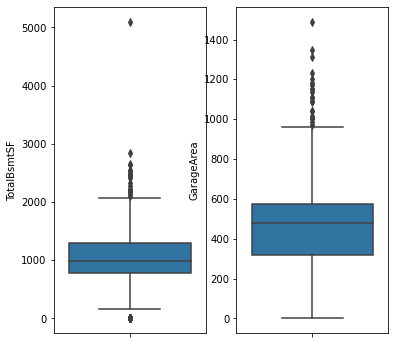

In [112]:
fig, axe = plt.subplots(1,2,figsize=(6,6))
for i in range(len(boxplot_uni_test)):
    ax = sns.boxplot(y = housing_test[boxplot_uni_test[i]], ax = axe[i])

**Observations :** 
- Beaucoup d'outliers donc on peut remplacer par la **moyenne** (on remplace avec les données du  **train**)

In [113]:
housing_test[boxplot_uni_test].isnull().sum()

TotalBsmtSF    1
GarageArea     1
dtype: int64

In [114]:
for i in housing_test[boxplot_uni_test]:
    mediane = df[i].median() #on recupere bien la mediane de notre df qui est dans le fichier du TRAIN
    housing_test[i].fillna(mediane, inplace = True)

In [115]:
housing_test[boxplot_uni_test].isnull().sum()
#les valeurs ont bien été remplacées

TotalBsmtSF    0
GarageArea     0
dtype: int64

##### imputing variables catégorielles par le mode :


In [116]:
#NA a remplacés : 
housing_test[countplot_uni_test].isnull().sum()

MSZoning         4
Exterior1st      1
Exterior2nd      1
MasVnrType      16
BsmtFullBath     2
KitchenQual      1
Functional       2
GarageCars       1
SaleType         1
dtype: int64

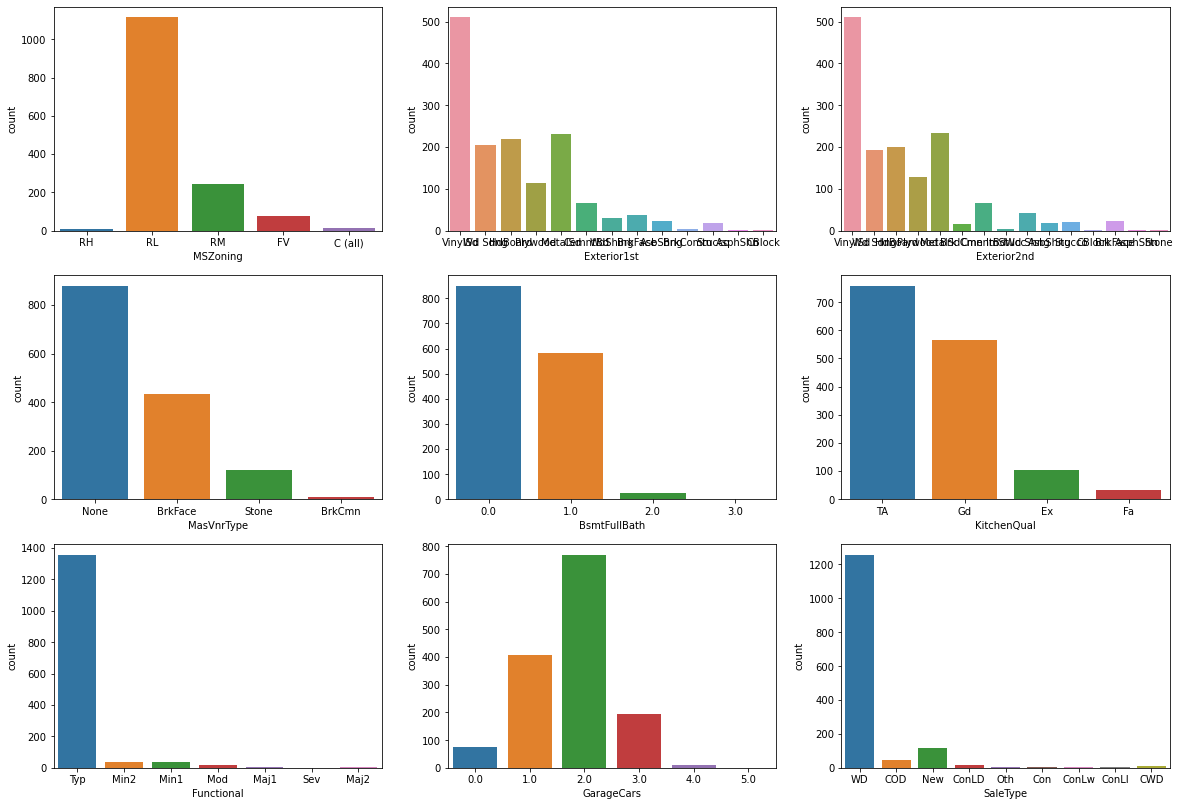

In [117]:
fig, axe = plt.subplots(3,3,figsize=(20,14))
for i in range(len(countplot_uni_test)) :
    nrow = i//3
    ncol = i%3
    ax = sns.countplot(countplot_uni_test[i],
                       data= housing_test, 
                       ax = axe[nrow,ncol])

### Attention  :

les données du test ci-présentes ne sont pas encore encodées, donc il va falloir chercher dans notre train nos données avant encodages. Donc on va recuperer nos données originelles contenues dans housing. (df étant sa copie ayant subit les différentes modifications avec entre autres, l'encodages et la normalisation).

In [118]:
#imputing variable categorique via le mode
for i in countplot_uni_test:
    mode = housing[i].value_counts().idxmax()# on recupere bien le mode dans housing
    housing_test[i].fillna(mode, inplace = True)

In [119]:
#Verification de l'imputing :
housing_test[countplot_uni_test].isnull().sum()

MSZoning        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtFullBath    0
KitchenQual     0
Functional      0
GarageCars      0
SaleType        0
dtype: int64

In [120]:
housing_test

,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition
0,1961,1961,882.0,896,896,730.0,20,RH,Pave,NaN,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,Unf,1.0,TA,TA,Y,NaN,MnPrv,NaN,0,WD,Normal
1,1958,1958,1329.0,1329,1329,312.0,20,RL,Pave,NaN,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,Unf,1.0,TA,TA,Y,NaN,NaN,Gar2,12500,WD,Normal
2,1997,1998,928.0,928,1629,482.0,60,RL,Pave,NaN,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,Fin,2.0,TA,TA,Y,NaN,MnPrv,NaN,0,WD,Normal
3,1998,1998,926.0,926,1604,470.0,60,RL,Pave,NaN,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,Fin,2.0,TA,TA,Y,NaN,NaN,NaN,0,WD,Normal
4,1992,1992,1280.0,1280,1280,506.0,120,RL,Pave,NaN,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,RFn,2.0,TA,TA,Y,NaN,NaN,NaN,0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1970,1970,546.0,546,1092,0.0,160,RM,Pave,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,0.0,NaN,NaN,Y,NaN,NaN,NaN,0,WD,Normal
1455,1970,1970,546.0,546,1092,286.0,160,RM,Pave,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,Unf,1.0,TA,TA,Y,NaN,NaN,NaN,0,WD,Abnorml
1456,1960,1996,1224.0,1224,1224,576.0,20,RL,Pave,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,1.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,Unf,2.0,TA,TA,Y,NaN,NaN,NaN,0,WD,Abnorml
1457,1992,1992,912.0,970,970,0.0,85,RL,Pave,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,0.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,700,WD,Normal


## Encodage du test :

In [121]:
#remplacement des NaN par "NaN"

In [122]:
housing_test[Var_NA] = housing_test[Var_NA].fillna("NaN")

In [123]:
#Encodage

In [124]:
housing_test[var_a_encoder] = encodage.fit_transform(housing_test[var_a_encoder])
housing_test[var_a_encoder].head(3)

,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,2.0,1.0,1.0,3.0,3.0,4.0,0.0,12.0,1.0,2.0,0.0,2.0,1.0,0.0,10.0,12.0,2.0,3.0,4.0,1.0,4.0,4.0,4.0,5.0,3.0,0.0,4.0,1.0,3.0,3.0,6.0,3.0,1.0,3.0,4.0,5.0,2.0,2.0,2.0,1.0,8.0,4.0
1,3.0,1.0,1.0,0.0,3.0,0.0,0.0,12.0,2.0,2.0,0.0,2.0,3.0,0.0,11.0,13.0,1.0,3.0,4.0,1.0,4.0,4.0,4.0,0.0,6.0,0.0,4.0,1.0,3.0,2.0,6.0,3.0,1.0,3.0,4.0,5.0,2.0,2.0,4.0,0.0,8.0,4.0
2,3.0,1.0,1.0,0.0,3.0,4.0,0.0,8.0,2.0,2.0,0.0,4.0,1.0,0.0,10.0,12.0,2.0,3.0,4.0,2.0,2.0,4.0,4.0,2.0,6.0,0.0,2.0,1.0,3.0,3.0,6.0,5.0,1.0,0.0,4.0,5.0,2.0,2.0,2.0,1.0,8.0,4.0


### Normalisation du test :

In [125]:
housing_test[var_continue] = (housing_test[var_continue]-housing_test[var_continue].mean())/housing_test[var_continue].std()

In [126]:
housing_test.head(3)

,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition
0,-0.340828,-1.072517,-0.370595,-0.654337,-1.215171,1.185515,20,2.0,1.0,1.0,3.0,3.0,4.0,0.0,12.0,1.0,2.0,0.0,2.0,5,6,1.0,0.0,10.0,12.0,2.0,3.0,4.0,1.0,4.0,4.0,4.0,5.0,3.0,0.0,4.0,1.0,3.0,0.0,1,0,2,1,3.0,5,6.0,0,3.0,1.0,3.0,1.0,4.0,5.0,2.0,2.0,2.0,1.0,0,8.0,4.0
1,-0.439544,-1.214492,0.639006,0.433150,-0.323429,-0.740981,20,3.0,1.0,1.0,0.0,3.0,0.0,0.0,12.0,2.0,2.0,0.0,2.0,6,6,3.0,0.0,11.0,13.0,1.0,3.0,4.0,1.0,4.0,4.0,4.0,0.0,6.0,0.0,4.0,1.0,3.0,0.0,1,1,3,1,2.0,6,6.0,0,3.0,1.0,3.0,1.0,4.0,5.0,2.0,2.0,4.0,0.0,12500,8.0,4.0
2,0.843770,0.678509,-0.266699,-0.573968,0.294407,0.042522,60,3.0,1.0,1.0,0.0,3.0,4.0,0.0,8.0,2.0,2.0,0.0,4.0,5,5,1.0,0.0,10.0,12.0,2.0,3.0,4.0,2.0,2.0,4.0,4.0,2.0,6.0,0.0,2.0,1.0,3.0,0.0,2,1,3,1,3.0,6,6.0,1,5.0,1.0,0.0,2.0,4.0,5.0,2.0,2.0,2.0,1.0,0,8.0,4.0


# 8. Scoring KNN

In [127]:
#Le meilleur model qu'on ai eu avec KNN est lors de l'utilisation de la GridSearchCV combiné a la cross validation
best_knn = best_knn_model_2.predict(housing_test[best_features])

### Concatenation de l'id maison avec la prediction pour avoir un df compatible aux exigences du projet kaggle : 

In [128]:
Prediction_knn = pd.DataFrame({"SalePrice" : best_knn}, index= housing_test_non_modif.Id)
Prediction_knn.to_csv(path_or_buf='model_knn.csv', sep = ',')

In [129]:
Prediction_knn.head()

,SalePrice
Id,
1461,125337.5
1462,147562.5
1463,183625.0
1464,187050.0
1465,193875.0


# 9. Scoring LinearRegression

In [130]:
prediction_LR = pd.DataFrame({"SalePrice" : best_model.predict(housing_test)}, index= housing_test_non_modif.Id)
prediction_LR.to_csv(path_or_buf='model_LR.csv', sep = ',')

In [131]:
prediction_LR.head()

,SalePrice
Id,
1461,105346.536525
1462,169760.678616
1463,179861.025073
1464,203735.952072
1465,200854.239918


# 10. Random forest 
- Pour aller encore plus loin, nous allons tester un 3eme model  qui est le random forest

In [132]:
forest = RandomForestRegressor()

In [133]:
forest.fit(data[data.columns[rfe.get_support()]], target)

RandomForestRegressor()

In [134]:
forest_predict = forest.predict(housing_test[data.columns[rfe.get_support()]])


In [135]:
prediction_forest = pd.DataFrame({"SalePrice" : forest_predict}, index= housing_test_non_modif.Id)
prediction_forest.to_csv(path_or_buf='random_forest1.csv', sep = ',')

In [136]:
prediction_forest.head()

,SalePrice
Id,
1461,120644.95
1462,152857.90
1463,172946.22
1464,184956.10
1465,207949.04


### Sur kaggle : 
- se rendre sur le lien suivant : https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/submit
- soumettre les modèles

# 10. Axe a ameliorer : 

- Creer des **fonctions**, par exemple une fonction d'encodages, etc pour pouvoir réutiliser plus rapidement le code (par exemple on creer les fonctions qui seront compatibles et ne plus réitérer les étapes lors du préprocessing du fichier test.
- Creer **d'autres notebook** pour rendre le **code plus lisible**, par exemple on **scinde** ce notebook en **plusieurs parties**, une premiere parties où on ne fait que le nettoyage des données, on créer un fichier csv avec le jeu de données nettoyés et on l'appel sur différents notebook où chaque notebook contiendra un modèle